In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from evolutionalg import *

# Cauchy and normal distributions comparision

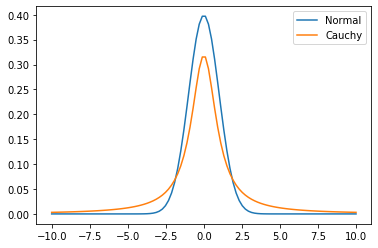

In [2]:
def normal_distribution(x, mean, dev):
    return 1. / (dev * np.sqrt(2*np.pi)) * np.power(np.e, -0.5 * ((x - mean) / dev)**2)

def cauchy_distribution(x, x0, y):
    return 1. / (np.pi * y * (1 + ((x - x0) / y)**2))

x = np.linspace(-10, 10, 100)
plt.plot(x, normal_distribution(x, 0, 1), x, cauchy_distribution(x, 0, 1))
plt.legend(["Normal", "Cauchy"])

# EvolutionAlg class

# Local minima

## Fitness function

In [9]:
def normal_distribution(x, mean, dev):
    return 1. / (dev * np.sqrt(2*np.pi)) * np.power(np.e, -0.5 * ((x - mean) / dev)**2)

def two_gauss(x):
    return 0.5 - normal_distribution(x, 10, 2) - normal_distribution(x, -2, 3.5)

def fitness_gauss(population):
    return [two_gauss(x[0]) for x in population]

def plot_population(population):
    x = np.linspace(-25, 25, 200)
    plt.plot(x, two_gauss(x))
    plt.scatter(population, two_gauss(population), c='r')
    
def plot_populations(populations):
    n = 3;
    fig, axs = plt.subplots(n, n, figsize=(16,8))
    x = np.linspace(-25, 25, 200)
    for i, p in enumerate(populations):
        axs[int(i/n), i%n].plot(x, two_gauss(x))
        axs[int(i/n), i%n].scatter(p, two_gauss(p), c='r')

## Initial population

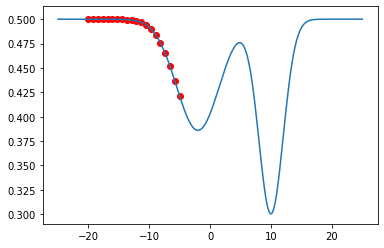

In [10]:
population = np.linspace(-20, -5, 20)
population = population.reshape((population.shape[0], 1))
plot_population(population)

## Parameters

In [11]:
iterations = 40;
children_num = 10;
crossover = 'arithmetic'
crossover_threshold = 0.6

## Normal distribution

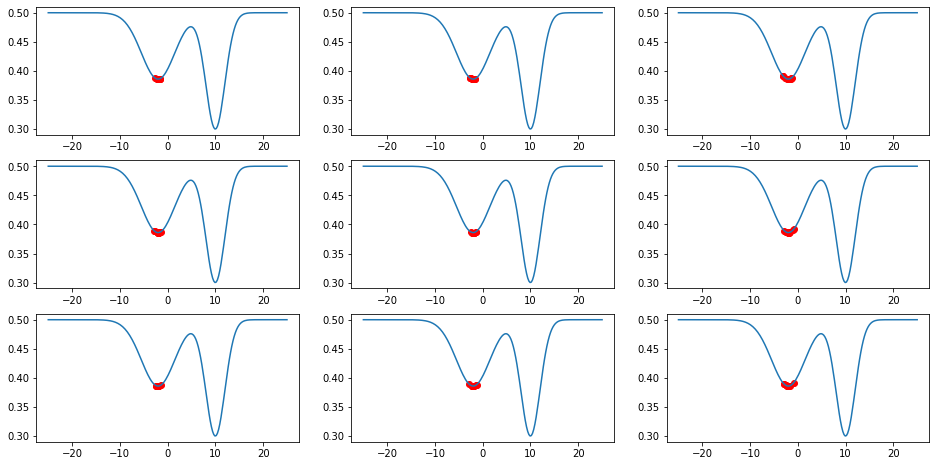

In [12]:
e = EvolutionAlg()
e.range_limits = [-20, 20]
normal_populations = []
for _ in range(9):
    normal_populations.append(e.run(population, fitness_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=0.5, crossover_threshold=crossover_threshold)[0])
plot_populations(normal_populations)

## Normal distribution - high std 

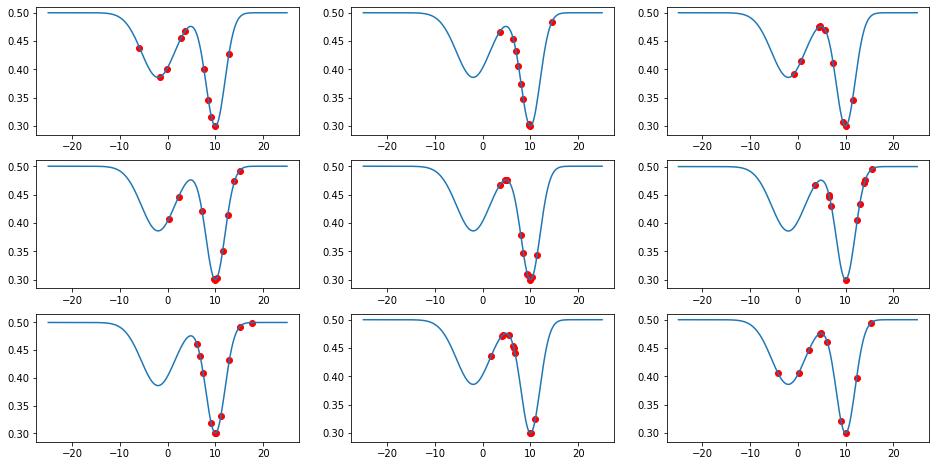

In [13]:
normal_populations2 = []
e.range_limits = [-20, 20]
for _ in range(9):
    normal_populations2.append(e.run(population, fitness_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=4, crossover_threshold=crossover_threshold)[0])
plot_populations(normal_populations2)

## Cauchy distribution

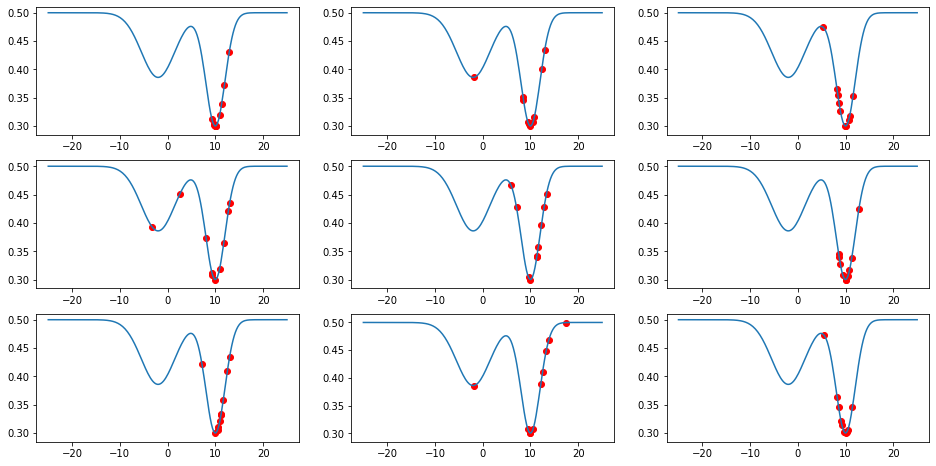

In [14]:
cauchy_populations = []
e.range_limits = [-20, 20]
for _ in range(9):
    cauchy_populations.append(e.run(population, fitness_gauss, iterations, children_num, mutation='cauchy',
                                    crossover_threshold=crossover_threshold)[0])
plot_populations(cauchy_populations)

# 3D analysis

In [15]:
from mpl_toolkits import mplot3d

## Fitness function
Based on 4 Gauss functions

In [16]:
def gauss_3d(x, y, A, x0, y0, sX, sY):
    val_x = (x - x0)**2 / (2 * sX**2)
    val_y = (y - y0)**2 / (2 * sY**2)
    return A * np.exp(-(val_x + val_y))

def four_gauss(x, y):
    return 1 - (gauss_3d(x, y, 1, -1, -1, 1.5, 1.5) + gauss_3d(x, y, 0.75, 2, 2, 1.25, 1.25)\
    + gauss_3d(x, y, 0.75, 2, -2, 1, 1) + gauss_3d(x, y, 0.75, -2, 2, 1.5, 1))

def fitness_four_gauss(population):
    return [four_gauss(x[0], x[1]) for x in population]

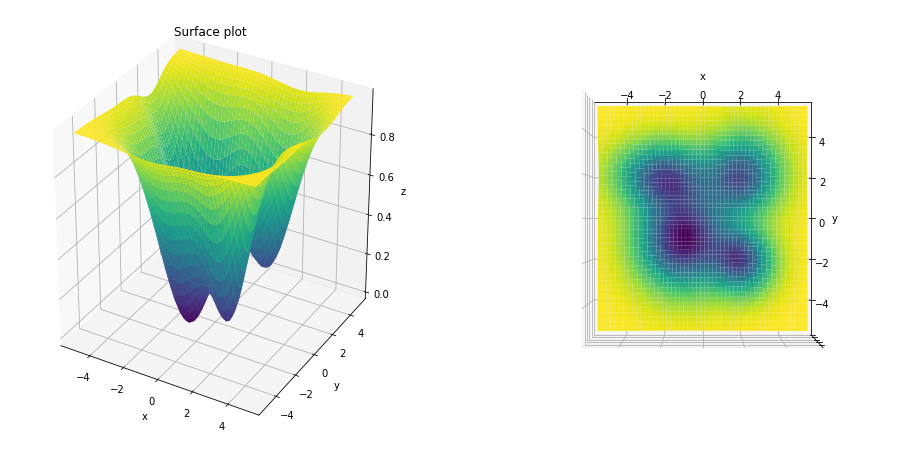

In [17]:
x = np.outer(np.linspace(-5, 5, 50), np.ones(50))
y = x.copy().T # transpose
z = four_gauss(x, y)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(azim=-90, elev=90)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

## Population

In [18]:
k = 10
xvalues = np.array(np.linspace(-5, 5, k))
yvalues =  xvalues

xx, yy = np.meshgrid(xvalues, yvalues, indexing='ij')
population = np.array([xx, yy]).transpose(1, 2, 0).reshape(k**2, 2)
zz = four_gauss(xx, yy)

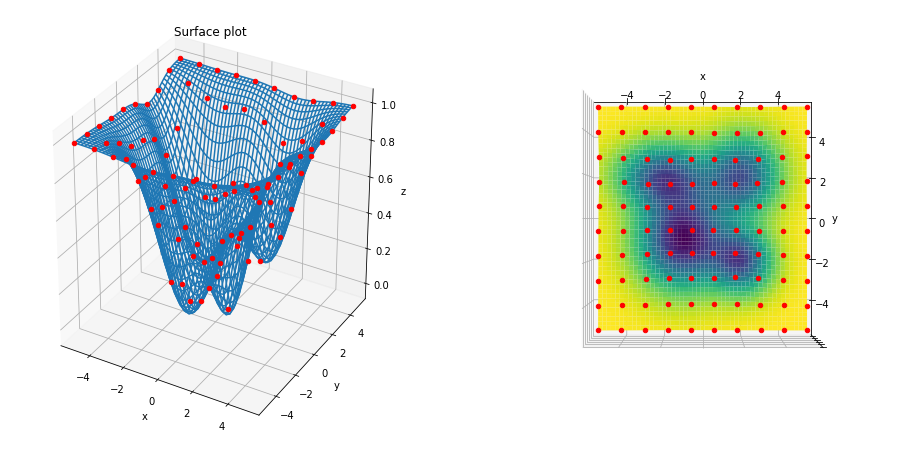

In [19]:
x = np.outer(np.linspace(-5, 5, 50), np.ones(50))
y = x.copy().T # transpose
z = four_gauss(x, y)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(x, y, z)
ax.scatter(xx, yy, zz, color='r', depthshade=False)
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(azim=-90, elev=90)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.scatter(xx, yy, zz, color='r', depthshade=False)
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

In [20]:
iterations = 40;
children_num = k**2;
crossover = 'arithmetic'
crossover_threshold = 0.6

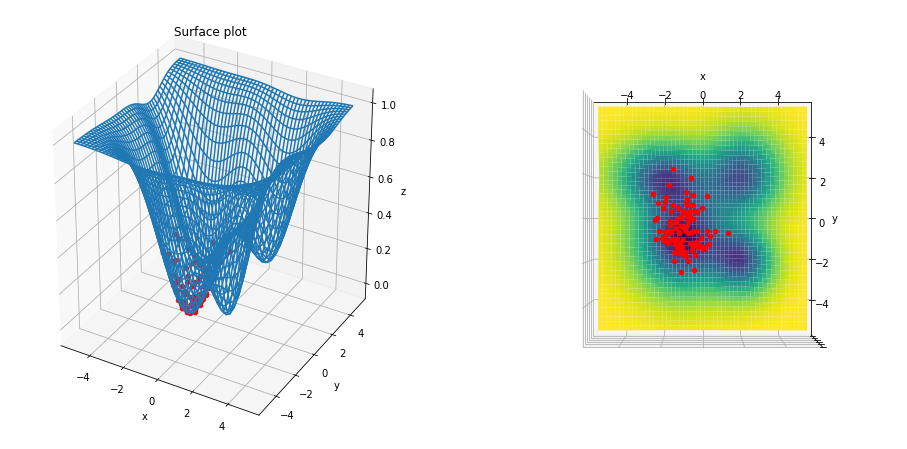

In [32]:
e.range_limits = [-5, 5]
res, _ = e.run(population, fitness_four_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=0.5, crossover_threshold=crossover_threshold)

xx = res[:, 0]
yy = res[:, 1]
zz = four_gauss(xx, yy)


fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(x, y, z)
ax.scatter(xx, yy, zz, color='r', depthshade=False)
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(azim=-90, elev=90)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.scatter(xx, yy, 1, color='r', depthshade=False)
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()